# LAB02 Assigment Template




### Exercise 0  Importing the census 

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames


# Pretty display for notebooks
%matplotlib inline

data = pd.read_csv("census.csv")

data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Exercise 1  Exploration 

In [3]:
# The total number of records
n_records = data.shape[0]
print(n_records)

45222


In [4]:
# The number of individuals making more than $50000 annually
n_greater_50k = data[data['income'] == '>50K'].shape[0]
print(n_greater_50k)

11208


In [5]:
# The number of individuals making at most $50000 annually
n_at_most_50k = data[data['income'] == '<=50K'].shape[0]
print(n_at_most_50k)

34014


In [6]:
# The percentage of individuals making at more than $50000 annually
greater_percent = (n_greater_50k/n_records)*100
print(greater_percent)


24.78439697492371


### Exercise 2 Preprocessing 

C:\Users\DELL\AppData\Local\Temp\ipykernel_20732\367943852.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['capital-gain'], ax=axes[0, 0])
d:\Anaconda\envs\environment1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\environment1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

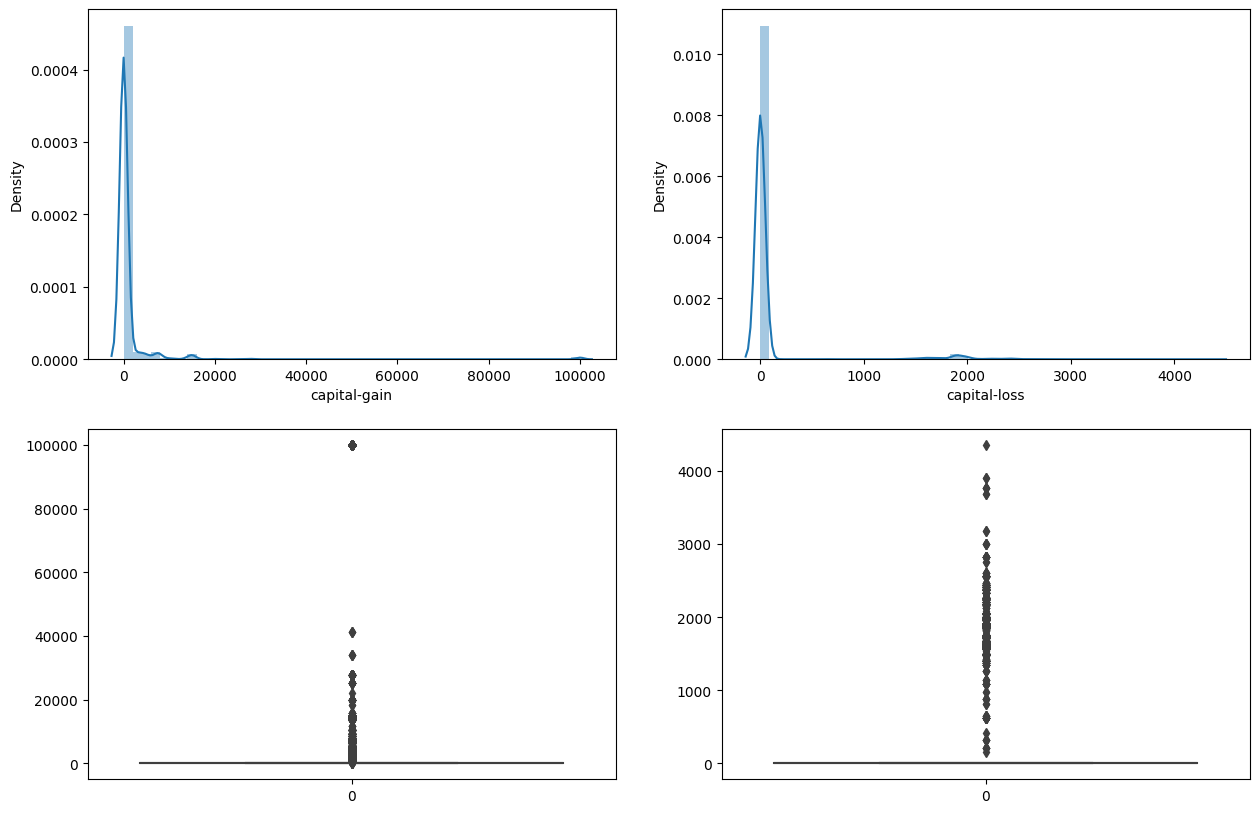

In [7]:
# Visualize skewed continuous features of original data: capital-gain, capital-loss
import matplotlib.pyplot as plt
import seaborn as sns

# draw 4 graph in one figure
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.distplot(data['capital-gain'], ax=axes[0, 0])
sns.distplot(data['capital-loss'], ax=axes[0, 1])
# draw boxplot
sns.boxplot(data['capital-gain'], ax=axes[1, 0])
sns.boxplot(data['capital-loss'], ax=axes[1, 1])
plt.show()

In [21]:
# Outliers Treatment: using log transformation
# translate the values by a small amount above 0 to apply the the logarithm successfully
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = data.copy()
features_log_transformed[skewed] = data[skewed].apply(lambda x: np.log(x + 1))
# compare log transformation and original data using statistics
print(data[skewed].describe())
print(features_log_transformed[skewed].describe())



       capital-gain  capital-loss
count  45222.000000  45222.000000
mean    1101.430344     88.595418
std     7506.430084    404.956092
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max    99999.000000   4356.000000
       capital-gain  capital-loss
count  45222.000000  45222.000000
mean       0.740759      0.355489
std        2.466527      1.595914
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max       11.512925      8.379539


In [9]:
# Data Transformation
# normalize the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_log_normalize_transform = features_log_transformed.copy()
features_log_normalize_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Perform one-hot encoding on the data
features_final = pd.get_dummies(features_log_normalize_transform, columns=['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country'])
# replace the income column with 0 and 1
features_final['income'].replace(['<=50K', '>50K'], [0, 1], inplace=True)
print(features_final.columns)

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc',
       ...
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia'],
      dtype='object', length=104)


### Exercise 3 Shuffle and Split Data

In [10]:
# Split the 'feature' and 'income' data into training and testing sets,80% for training and 20% for testing
from sklearn.model_selection import train_test_split
X = features_final.drop('income', axis=1)
Y = features_final['income']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Exercise 4 Evaluating Model
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression
You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

In [11]:
# Evaluating Model: Gaussian Naive Bayes, Decision Tree, Logistic Regression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, fbeta_score
from sklearn import metrics

### Exercise 4 Questions
What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

In [12]:
# What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000
# a naive model that always predict an individual made more than $50,000
accuracy = (n_greater_50k/n_records)
fscore = (1+0.5**2)*(accuracy)/(0.5**2*accuracy+1)
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))


Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


### Exercise 5 Evaluating Model 

Gaussian Naive Bayes accuracy =  0.6045328911000553
Decision Tree accuracy =  0.8168048645660586
Logistic Regression accuracy =  0.84212271973466


d:\Anaconda\envs\environment1\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


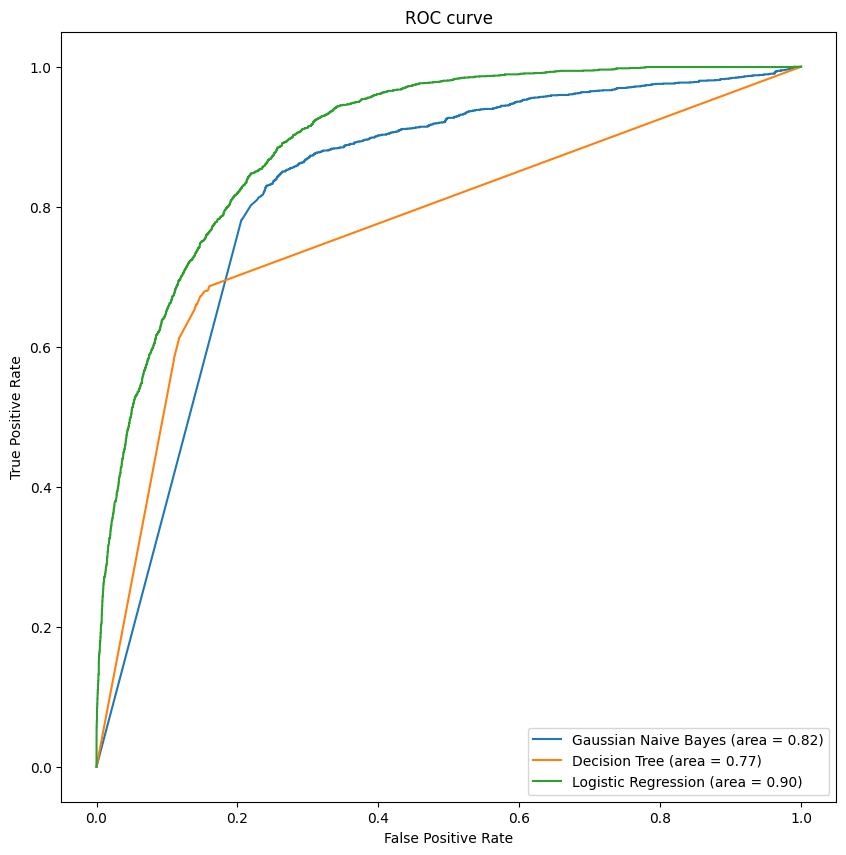

In [13]:
#Gaussion Naive Bayes
model1 = GaussianNB()
model1.fit(X_train,y_train)
y_prediction = model1.predict(X_test)
print('Gaussian Naive Bayes accuracy = ', metrics.accuracy_score(y_prediction,y_test))

# Decision Tree
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train) 
y_prediction = model2.predict(X_test) 
print('Decision Tree accuracy = ', metrics.accuracy_score(y_prediction,y_test))

# Logistic Regression
model3 = LogisticRegression()
model3.fit(X_train,y_train)
y_prediction = model3.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(y_prediction,y_test))

# draw ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Gaussian Naive Bayes
y_prediction = model1.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prediction)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (area = %0.2f)' % roc_auc)
# Decision Tree
y_prediction = model2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prediction)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % roc_auc)
# Logistic Regression
y_prediction = model3.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prediction)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()




## Question:
### Q1:

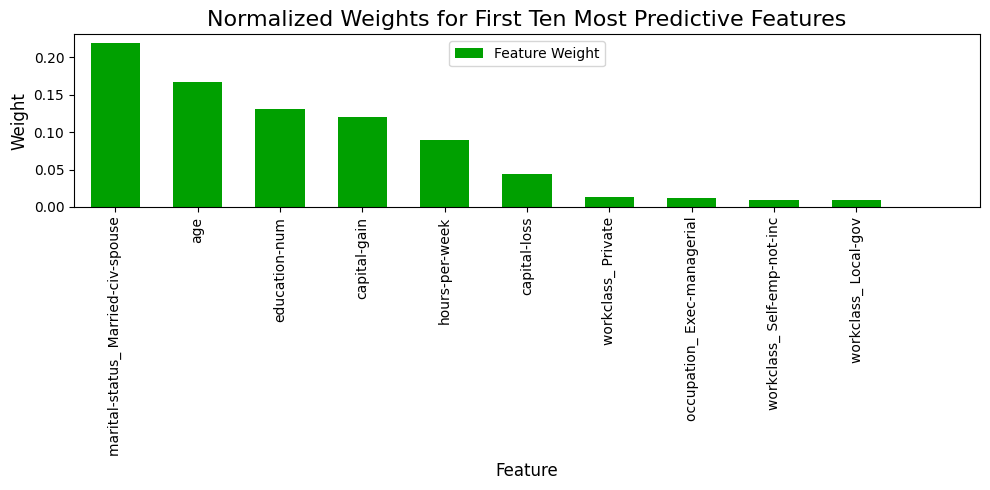

In [17]:
#using scikit-learn to show the feature importance
#Decision Tree
importances = model2.feature_importances_
# sort the feature importances
indices = np.argsort(importances)[::-1]
columns = X_train.columns.values[indices[:10]]
values = importances[indices][:10]
# Creat the plot
fig = plt.figure(figsize = (10,5))
plt.title("Normalized Weights for First Ten Most Predictive Features", fontsize = 16)
plt.bar(np.arange(10), values, width = 0.6, align="center", color = '#00A000', \
      label = "Feature Weight")
plt.xticks(np.arange(10), columns, rotation=90)
plt.xlim((-0.5, 10.5))
plt.ylabel("Weight", fontsize = 12)
plt.xlabel("Feature", fontsize = 12)
plt.legend(loc = 'upper center')
plt.tight_layout()
plt.show()